### Problem 31 ###
In England the currency is made up of pound, £, and pence, p, and there are eight coins in general circulation:

1p, 2p, 5p, 10p, 20p, 50p, £1 (100p) and £2 (200p).
It is possible to make £2 in the following way:

1×£1 + 1×50p + 2×20p + 1×5p + 1×2p + 3×1p
How many different ways can £2 be made using any number of coins?

In [7]:
import numpy as np
import functools

In [1]:
# using concrete ideas

let's write 1p as $z^{1}$,
2p as $z^{2}$,
5p as $z^{5}$ and etc

$P$ = 1 + $z^{1}$ + $z^{2}$ + $z^{3}$... <br>
$P_2$ = (1 + $z^{2}$ + $z^{4}$ + $z^{6}$... )$P$<br>
$P_5$ = (1 + $z^{5}$ + $z^{10}$ + $z^{15}$...)$P_2$ <br>
$P_{10}$ = (1 + $z^{10}$ + $z^{20}$ + $z^{30}$...)$P_5$<br>
$P_{20}$ = (1 + $z^{20}$ + $z^{40}$ + $z^{60}$...)$P_{10}$<br>
$P_{50}$ = (1 + $z^{50}$ + $z^{100}$ + $z^{150}$...)$P_{20}$ <br>
$P_{100}$ = (1 + $z^{100}$ + $z^{200}$ + $z^{300}$...)$P_{50}$ <br>
$P_{200}$ = (1 + $z^{200}$ + $z^{400}$ + $z^{600}$...)$P_{100}$ <br>


In [4]:
#therefore:

$P$ = $\frac{1}{1-z}$ <br>
$P_2$ = $\frac{1}{1-z^{2}}P$<br>
$P_5$ = $\frac{1}{1-z^{5}}P_2$ <br>
$P_{10}$ = $\frac{1}{1-z^{10}}P_5$<br>
$P_{20}$ = $\frac{1}{1-z^{20}}P_{10}$<br>
$P_{50}$ = $\frac{1}{1-z^{50}}P_{20}$ <br>
$P_{100}$ = $\frac{1}{1-z^{100}}P_{50}$ <br>
$P_{200}$ = $\frac{1}{1-z^{200}}P_{100}$ <br>


In [1]:
#since we wanna know the ways to make 200 using every type of coin,lets multiply every equation to get:

$P_{200} = \frac{1}{(1-z) (1-z^{2})(1-z^{5})(1-z^{10})(1-z^{20})(1-z^{50})(1-z^{100})(1-z^{200})}$ <br>

In [8]:
# so we only need to get the coefficient of z**200 of that power series

let's rewrite the denominator, replacing $\frac{1}{1-z}$ as $\frac{1+z+z^2+z^3+z^4}{1-z^5}$, and $\frac{1}{1-z^2}$ as $\frac{(1+z+z^2+z^3+z^4)}{(1+z)(1-z^5)}$ thus gettin us to:

$P_{200}$$= \frac{(1+z+z^2+z^3+z^4)^2}{(1+z)(1-z^5)(1-z^5)(1-z^{5})(1-z^{10})(1-z^{20})(1-z^{50})(1-z^{100})(1-z^{200})}$ <br> 
<br>
therefore: $P_{200}$ = $\frac{(1+z+z^2+z^3+z^4)^2\hat{P}(z^5)}{(1+z)}$ <br> 

<br>
where $\hat{P}(z) = \frac{1}{(1-z)(1-z)(1-z)(1-z^{2})(1-z^{4})(1-z^{10})(1-z^{20})(1-z^{40})}$<br>
<br>

now we write $\hat{P}(z)=$ $\frac{A(z)}{(1-z^{40})^8}$ where $A(z)$ is a $A_0 + A_1z + ... + A_{241} z^{241}$ <br>
<br>

where A(z) = $(1+z+z^2+...+z^{39})^3(1+z^2+...+z^{38})(1+z^4+...+z^{36})(1+z^{10}+...+z^{30})(1+z^{20})$<br>
<br>
note that $\frac{1}{(1-z^{40})^8}$ = $\sum_{n\geq0}^{8}{\binom{n+7}{7}z^{40n}}$<br>
so........... <br>
$\hat{P}(z)=$ $A(z) * \sum_{n\geq0}{\binom{n+7}{7}z^{40n}}$

In [20]:
def binom(n,k):
    return 1 if k==0 else (0 if n==0 else binom(n-1, k) + binom(n-1, k-1))

In [147]:
def calcul_A():
    'calcula o nosso amigo A(z)'
    m = 40*[1] # grau 39
    n = [1] + 19*[0,1] # grau 38 e pula os impares
    o = [1] + 9*[0,0,0,1] # grau 36
    p = [1] + 3*[0,0,0,0,0,0,0,0,0,1] # grau 30
    q = [1] + 19*[0] + [1] # grau 20

    mm = np.polymul(m,m) #39*39
    r = np.polymul(mm,m) #39*39*39
    s = np.polymul(r,n) #39*39*39*38
    t = np.polymul(s,o) #39*39*39*38*36
    u = np.polymul(t,p) #39*39*39*38*36*30
    v = np.polymul(u,q) #39*39*39*38*36*30*20
    return v

In [150]:
A = calcul_A()

In [151]:
a = [-1] + 39*[0] +[1]
aa = np.polymul(a,a)
aaaa = np.polymul(aa,aa)
a8 = np.polymul(aaaa,aaaa)

In [152]:
phat = np.polydiv(A,a8)[1]

this gives us:
 $P_{200} = $ $\delta (z)*(1+z+...+z^{4})^{2}* A(z) * \sum_{n\geq0}{\binom{n+7}{7}z^{40n}}$

where $\delta(z)$ is a sign function that came from the $\frac {1}{1+z} = \sum_{k} (-1)^{k}z^{k} $

$P_{200} =  (1+z+...+z^{4})^{2}* A(z) * \sum_{k\geq0}^{8}{\binom{k+7}{7}(-1)^{k}z^{40k}}$

In [158]:
def p200():
    l = 5*[1]
    ll = np.polymul(l,l)
    gg = np.polymul(ll,phat)
    return gg

In [165]:
gg[-201]

444355050.0

$P_{200}$ = $\frac{1}{(1-z) (1-z^{2})(1-z^{5})(1-z^{10})(1-z^{20})(1-z^{50})(1-z^{100})(1-z^{200})}$ <br>
<br>
well, its equal to $P_{200}$ = $\frac{A(z)}{(1-z^{200})^8}$ <br>
<br>
where $A(z) =(1+z+...+z^{199})(1+z^{2}+...+z^{198})(1+z^{5}+...+z^{195})(1+z^{10}+...+z^{190})(1+z^{20}+...+z^{180})(1+z^{50}+...+z^{150})(1+z^{100}))$ <br>
<br>
note that $\frac{1}{(1-z^{200})^8}$ = $\sum_{n\geq0}{\binom{n+7}{7}z^{200n}}$ <br>
<br>
therefore $P_{200} =  \sum_{n\geq0}{\binom{n+7}{7}A_{j}z^{200n}}$ <br>
<br>
when n = 200q+r,

$P_{n}= $ [$z^n$]$P(z)$ = $A_r \binom{q+7}{7} + A_{r+200} \binom{q+6}{7} + A_{r+400} \binom{q+5}{7} + A_{r+600} \binom{q+4}{7} + A_{r+800} \binom{q+3}{7} + A_{r+1000} \binom{q+2}{7} + A_{r+1200} \binom{q+1}{7} + A_{r+1400} \binom{q}{7}$ <br>
thus we get: <br>
<br>
$P_{200}= $ [$z^{200}$]$P(z)$ = $A_0 \binom{1+7}{7} + A_{200} \binom{7}{7}$ <br>

In [119]:
def calcul_A():
    'calcula o nosso amigo A(z)'
    m = 200*[1] # grau 199
    n = [1] + 99*[0,1] # grau 198 e pula os impares
    o = [1] + 39*[0,0,0,0,1] # grau 195
    p = [1] + 19*[0,0,0,0,0,0,0,0,0,1] # grau 190
    q = [1] + 9*(19*[0] + [1]) # grau 180
    a = [1] + 3*(49*[0] + [1]) # grau 150
    b = [1] + 99*[0] + [1] # grau 100
    
    c = np.polymul(m,n)
    r = np.polymul(c,o) 
    s = np.polymul(r,p) 
    t = np.polymul(s,q)
    u = np.polymul(a,b)
    v = np.polymul(t,u)
    
    return v

In [120]:
quo = [-1] + 199*[0] + [1]
quo2 = np.polymul(quo,quo)
quo4 = np.polymul(quo2,quo2)
quo8 = np.polymul(quo4,quo4)

# aqui calculo o (1-z**200)**8

In [123]:
A = calcul_A()

In [124]:
def euler31():
    ''
    jesus = np.polydiv(A,quo8)[1]
    return binom(8,7) * jesus[0] + binom(7,7) * jesus[200]

In [125]:
%timeit euler31()

1000 loops, best of 3: 281 µs per loop


In [52]:
def binom(n,k):
    return 1 if k==0 else (0 if n==0 else binom(n-1, k) + binom(n-1, k-1))

def gcd(a, b):
    """Return greatest common divisor using Euclid's Algorithm."""
    while b:      
        a, b = b, a % b
    return a

def lcm(a, b):
    """Return lowest common multiple."""
    return a * b // gcd(a, b)

def lcmm(nums):
    return functools.reduce(lambda x, y: lcm(x, y), nums)

In [15]:
def euler31_knuth(coins,change):
    'returns the number of ways you can give change using all the coin in coins'
    #supposing coins are all integers:
    m = lcmm(coins)
    k = len(coins)
    
    deno_pol = [-1] + (m-1)*[0] + [1]
    deno_pol = np.poly1d(deno_pol) ** k
    
    nume_pol = [1]
    for c in coins:
        coef = int(m/c)
        _pol = [1] + (coef-1)*((c-1)*[0] + [1])
        nume_pol = np.polymul(nume_pol,_pol)
           
    ult_pol = np.polydiv(nume_pol,deno_pol)[1]
    
    ans = 0
    q,r = divmod(change,m)
    for i in range(q+1):
        ans += binom(i+k-1,k-1) * ult_pol[r+200*abs(q-i)]
    return ans

In [13]:
coins = [1,2,5,10,20,50,100,200]

In [9]:
%timeit euler31_knuth(coins,200)

4.06 ms ± 42.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
euler31_knuth(coins,200)

73682.0

In [17]:
def euler031_rec(coins,target):
    if len(coins) == 1:
        return 1
    curr_ans = 0
    for a in range(target//coins[-1] + 1):
        new_target = target - a*coins[-1]
        curr_ans += euler031_rec(coins[:-1],new_target)
    return curr_ans

In [19]:
%timeit euler031_recursive(coins,200)

10 loops, best of 3: 43.3 ms per loop


In [21]:
def euler031_rec_end2(coins,target):
    if len(coins) == 2:
        return target//coins[-1] + 1
    curr_ans = 0
    for a in range(target//coins[-1] + 1):
        new_target = target - a*coins[-1]
        curr_ans += euler031_rec_end2(coins[:-1],new_target)
    return curr_ans

In [23]:
%timeit euler031_rec_end2(coins,200)

100 loops, best of 3: 2.71 ms per loop


In [24]:
%timeit euler031_rec_end2(coins,200)
%timeit euler031_rec_end2(coins,400)
%timeit euler031_rec_end2(coins,800)

100 loops, best of 3: 2.81 ms per loop
10 loops, best of 3: 40.3 ms per loop
1 loop, best of 3: 961 ms per loop


In [96]:
def euler031_rec_2by2(coins,target):
    if len(coins) == 1:
        return  1
    if len(coins) == 2:
        return target//coins[-1] + 1
    
    curr_ans = 0
    
    for a in range(target//coins[-1] + 1):
        new_target = target - a*coins[-1]
        for b in range(new_target//coins[-2] + 1):
            new_targ2 = new_target - b*coins[-2]
            curr_ans += euler031_rec_2by2(coins[:-2],new_targ2)
            
    return curr_ans

In [32]:
%timeit euler031_rec_2by2(coins,200)

10 loops, best of 3: 20.2 ms per loop


In [92]:
euler031_rec_end2(coins,50)

451

In [104]:
%timeit euler031_rec_2by2(coins,200)

100 loops, best of 3: 2.91 ms per loop


In [105]:
euler031_rec_2by2(coins,6)

5

1 - > 1  (1) <br/>
2 - > 2  (11,2) <br/>
3 - > 2  (111,12) <br/>
4 - > 3  (1111,112,22) <br/>
5 - > 4  (11111,1112,122,5) <br/>
6 - > 5  (111111,11112,1122,222,15) <br/>
7 - > 6  (1111111,111112,11122,511,1222,52) <br/>

In [ ]:
coins [1..8] = { 1, 2 , 5 , 10 , 20 , 50 , 100 , 200 }
amount = 200
ways [0.. amount ] = { uninitialized array }
ways [0] = 1;
for i = 1 to 8 do :
for j = coins [i] to amount do :
ways [j] = ways [j] + ways [j - coins [ i ]]
print ways [ amount ]


In [107]:
def goldbach_031(coins,change):
    i = 1
    for a in range(201): 
        for b in range(101):
            for c in range(51): 
                for d in range(21):
                    for e in range(11):
                        for f in range(6):
                            for g in range(3):
                                if(a + 2*b + 5*c + 10*d + 20*e + 50*f + 100*g == 200):
                                    i+=1
    return i

In [134]:
def euler031_pd(coins, target):
    ans = [1] + [0] * target
    for c in coins:
        for n in range(target-c+1):
            ans[c+n] += ans[n]
    return ans

In [120]:
%timeit euler031_pd(coins,200)

1000 loops, best of 3: 207 µs per loop


In [25]:
euler031_pd(coins,200)

NameError: name 'euler031_pd' is not defined

In [1]:
def pe031_rec(coins,target):
    'solução recursiva com passos de 1'
    if len(coins) == 1:
        if target%coins[0] == 0:
            return 1
        return 0 
    curr_ans = 0
    for a in range(target//coins[-1] + 1):
        new_target = target - a*coins[-1]
        curr_ans += pe031_rec(coins[:-1],new_target)
    return curr_ans

def pe031_rec_end2(coins,target):
    'solução recursiva com passos de 1, menos o ultimo que é de 2'
    if len(coins) == 2:
        return target//coins[-1] + 1
    curr_ans = 0
    for a in range(target//coins[-1] + 1):
        new_target = target - a*coins[-1]
        curr_ans += pe031_rec_end2(coins[:-1],new_target)
    return curr_ans

def pe031_rec_2by2(coins,target):
    'solução recursiva com passo de 2'
    if len(coins) == 1:
        return  1
    if len(coins) == 2:
        return target//coins[-1] + 1
    
    curr_ans = 0
    
    for a in range(target//coins[-1] + 1):
        new_target = target - a*coins[-1]
        for b in range(new_target//coins[-2] + 1):
            new_targ2 = new_target - b*coins[-2]
            curr_ans += pe031_rec_2by2(coins[:-2],new_targ2)
            
    return curr_ans

def pe031_pd(coins, target):
    'solução por programação dinamica, de baixo pra cima'
    ans = [1] + [0] * target
    for c in coins:
        for n in range(target-c+1):
            ans[c+n] += ans[n]
    return ans[-1]


In [2]:
import numpy as np 

dcoins = [1,2,5,10,20,50,100,200]
assert(pe031_rec(dcoins,200) == pe031_rec_end2(dcoins,200) == pe031_rec_2by2(dcoins,200) == pe031_pd(dcoins,200))


In [16]:
dcoins = [1,2,5,10,20,50,100,200]
assert(pe031_rec(dcoins,200) == pe031_rec_end2(dcoins,200) == pe031_rec_2by2(dcoins,200) == pe031_pd(dcoins,200))
for target in range(200,401,50):
    assert(pe031_rec(dcoins,target) == pe031_rec_end2(dcoins,target) == pe031_rec_2by2(dcoins,target) == pe031_pd(dcoins,target))

In [52]:
#tests if they all solve the pe031 problem
coins = [1,2,5,10,20,50,100,200]
assert(pe031_rec(coins,200) == pe031_rec_end2(coins,200) == pe031_rec_2by2(coins,200) == pe031_pd(coins,200))

#tests for different values of the target(change)
for target in range(200,401,50):
	assert(pe031_rec(coins,target) == pe031_rec_end2(coins,target) == pe031_rec_2by2(coins,target) == pe031_pd(coins,target))
#tests for different values of coins


def gcd(a, b):
    """Return greatest common divisor using Euclid's Algorithm."""
    while b:      
        a, b = b, a % b
    return a

def lcm(a, b):
    """Return lowest common multiple."""
    return a * b // gcd(a, b)

def lcmm(nums):
    return functools.reduce(lambda x, y: lcm(x, y), nums)

def n_coins_gen(n):
    'returns a list with n random coins rangin up to teto'
    # notet that we need to define a new target for every set of coins since we need to be able to get to the target anyhow
    ans = []
    for _ in range(n//2):
        k = np.random.randint(1,10)
        ans += [k,10*k,100*k]
    new_target = lcmm(ans)
    return ans,new_target

In [53]:
for l in range(3,9):
    coins,target = n_coins_gen(l)
    assert(pe031_rec(coins,target) == pe031_rec_end2(coins,target) == pe031_rec_2by2(coins,target) == pe031_pd(coins,target))

AssertionError: 

In [24]:
for target in range(200,401,50):
    for l in range(3,9):
        coins,target = n_coins_gen(l)
        assert(pe031_rec(coins,target) == pe031_rec_end2(coins,target) == pe031_rec_2by2(coins,target) == pe031_pd(coins,target))

KeyboardInterrupt: 

In [45]:
target = 288 + 59

In [26]:
coins
coins,a = n_coins_gen(3)

In [47]:
coins = [24,34,1412]

In [37]:
pe031_rec_end2(coins,16)

1

In [38]:
pe031_rec_2by2(coins,target)

4

In [48]:
pe031_pd(coins,target)

1

In [11]:
target

0

In [10]:
coins

[98, 0, 87, 131]

In [ ]:
for l in range(4,9):
	coins,target = n_coins_gen(l)
	assert(pe031_rec(coins,target) == pe031_rec_end2(coins,target) == pe031_rec_2by2(coins,target) == pe031_pd(coins,target))
    

In [13]:
pe031_rec(coins,target) , pe031_rec_end2(coins,target) , pe031_rec_2by2(coins,target) , pe031_pd(coins,target)

KeyboardInterrupt: 

In [55]:
coins 

[6, 60, 600, 5, 50, 500]

In [56]:
target

3000

In [57]:
pe031_rec(coins,target) , pe031_rec_end2(coins,target) , pe031_rec_2by2(coins,target) , pe031_pd(coins,target)

(185710, 1090975, 1090975, 185710)

In [90]:
18 + 24 

42

In [86]:
42 + 42+ 42

126

In [87]:
174 - 126

48

In [75]:
def n_coins_gen(n,teto=200):
    'returns a list with n pseudo non prime random coins rangin up to teto'
    # notet that we need to define a new target for every set of coins since we need to be able to get to the target somehow... or do we?
    ans = []
    for _ in range(n):
        k = np.random.randint(1,100)
        ans += [k,10*k,100*k]
    #the easiest way to do it is the lcmm.
    ans2 = []
    for an in ans:
        if an <= teto:
            ans2.append(an)
    return ans2

In [76]:
n_coins_gen(10,200)

[29, 52, 17, 170, 1, 10, 100, 73, 46, 55, 58, 45, 4, 40]

In [82]:
for target in range(2000,4010,500):
	for l in range(3,9):
		coins= n_coins_gen(l)
		assert(pe031_rec(coins,target) == pe031_rec_end2(coins,target) == pe031_rec_2by2(coins,target) == pe031_pd(coins,target))

AssertionError: 

In [116]:
(pe031_rec(coins,target),pe031_rec_end2(coins,target) , pe031_rec_2by2(coins,target) , pe031_pd(coins,target))

(126, 126, 126, 126)

In [92]:
target

2000

In [115]:
coins

[83, 81, 14, 140]

In [132]:
#note that all recursive functions wont yield the right answer if the target isnt a multiple of every coins
def pe031_rec(coins,target):
    'solução recursiva com passos de 1'
    if len(coins) == 1:
        if target%coins[0] == 0:
            return 1
        return 0
    
    curr_ans = 0
    for a in range(target//coins[-1] + 1):
        new_target = target - a*coins[-1]
        curr_ans += pe031_rec(coins[:-1],new_target)
    return curr_ans

def pe031_rec_end2(coins,target):
    'solução recursiva com passos de 1, menos o ultimo que é de 2'
    if len(coins) == 2:
        return pe031_pd(coins,target)
    
    curr_ans = 0
    for a in range(target//coins[-1] + 1):
        new_target = target - a*coins[-1]
        curr_ans += pe031_rec_end2(coins[:-1],new_target)
    return curr_ans

def pe031_rec_2by2(coins,target):
    'solução recursiva com passo de 2'
    if len(coins) == 1:
        if target%coins[0] == 0:
            return 1
        return 0
        
    if len(coins) == 2:
        if not target%coins[0]  and not target%coins[1]:
            return target//coins[-1] + 1
        return pe031_pd(coins,target) 
    curr_ans = 0

    for a in range(target//coins[-1] + 1):
        new_target = target - a*coins[-1]
        for b in range(new_target//coins[-2] + 1):
            new_targ2 = new_target - b*coins[-2]
            curr_ans += pe031_rec_2by2(coins[:-2],new_targ2)
            
    return curr_ans

def pe031_pd(coins, target):
    'solução por programação dinamica, de baixo pra cima'
    ans = [1] + [0] * target
    for c in coins:
        for n in range(target-c+1):
            ans[c+n] += ans[n]
    return ans[-1]

In [135]:
for target in range(2000,4001,500):
	for l in range(3,9):
		coins= n_coins_gen(l)
		assert(pe031_rec(coins,target) == pe031_rec_end2(coins,target) == pe031_rec_2by2(coins,target) == pe031_pd(coins,target))

KeyboardInterrupt: 

In [133]:
import numpy as np 
import functools

#tests if they all solve the pe031 problem
coins = [1,2,5,10,20,50,100,200]
assert(pe031_rec(coins,200) == pe031_rec_end2(coins,200) == pe031_rec_2by2(coins,200) == pe031_pd(coins,200))

#tests for different values of the target(change)
for target in range(200,401,50):
	assert(pe031_rec(coins,target) == pe031_rec_end2(coins,target) == pe031_rec_2by2(coins,target) == pe031_pd(coins,target))
#tests for different values of coins


def gcd(a, b):
    """Return greatest common divisor using Euclid's Algorithm."""
    while b:      
        a, b = b, a % b
    return a

def lcm(a, b):
    """Return lowest common multiple."""
    return a * b // gcd(a, b)

def lcmm(nums):
    return functools.reduce(lambda x, y: lcm(x, y), nums)

def n_coins_gen(n,teto=200):
    'returns a list with n pseudo non prime random coins rangin up to teto'
    # notet that we need to define a new target for every set of coins since we need to be able to get to the target somehow... or do we?
    ans = []
    for _ in range(n):
        k = np.random.randint(1,100)
        ans += [k,10*k,100*k]
    #the easiest way to do it is the lcmm.
    ans2 = []
    for an in ans:
        if an <= teto:
            ans2.append(an)
    return ans2
    
for target in range(200,401,50):
	for l in range(3,9):
		coins= n_coins_gen(l)
		assert(pe031_rec(coins,target) == pe031_rec_end2(coins,target) == pe031_rec_2by2(coins,target) == pe031_pd(coins,target))

AssertionError: 

In [140]:
pe031_rec(coins,target) , pe031_rec_end2(coins,target) , pe031_rec_2by2(coins,target) , pe031_pd(coins,target)

KeyboardInterrupt: 

In [139]:
coins = [1,2,5,10,20,50,100,200]

In [137]:
target 

2000

In [142]:
pe031_rec(coins,200)

73682

In [160]:
from time import clock
import matplotlib.pyplot as plt
import numpy as np

def timer(func,coins,target):
	t0 = clock()
	func(coins,target)
	t1 = clock()
	return t1-t0

dcoins = [1,2,5,10,20,50,100,200]
dtarget = 200 

#tempos para o problema default:

print('lets measure some time')
time_rec = []
time_rec2 = []
time_rec_2by2 = []
time_pd = []
for j in range(2):
    beta_rec = []
    beta_rec2 = []
    beta_2by2 = []
    beta_pd = []
    for i in range(30):
        beta_rec += [timer(pe031_rec,dcoins,dtarget)]
        beta_rec2 += [timer(pe031_rec_end2,dcoins,dtarget)]
        beta_2by2 += [timer(pe031_rec_2by2,dcoins,dtarget)]
        beta_pd += [timer(pe031_pd,dcoins,dtarget)]
    beta_rec.sort()
    beta_rec2.sort()
    beta_2by2.sort()
    beta_pd.sort()
    time_rec += [sum(beta_rec[:20])/20]
    time_rec2 += [sum(beta_rec2[:20])/20]
    time_rec_2by2 += [sum(beta_2by2[:20])/20]
    time_pd += [sum(beta_pd[:20])/20]

lets measure some time


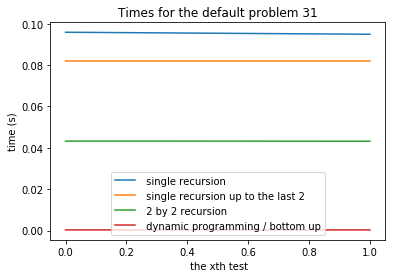

In [162]:
plt.plot(time_rec,label = ' single recursion');
plt.plot(time_rec2,label = ' single recursion up to the last 2');
plt.plot(time_rec_2by2,label = ' 2 by 2 recursion');
plt.plot(time_pd,label = ' dynamic programming / bottom up');
plt.xlabel(' the xth test')
plt.ylabel('time (s)')
plt.title('Times for the default problem 31')
plt.legend(loc = 0)
plt.show();

In [166]:
targets = [200*i for i in range(1,4)]

time_rec = []
time_rec2 = []
time_rec_2by2 = []
time_pd = []
for target in targets:
	print('lets measure some moar time')
	for j in range(2):
	    beta_rec = []
	    beta_rec2 = []
	    beta_2by2 = []
	    beta_pd = []
	    for i in range(30):
	        beta_rec += [timer(pe031_rec,dcoins,target)]
	        beta_rec2 += [timer(pe031_rec_end2,dcoins,target)]
	        beta_2by2 += [timer(pe031_rec_2by2,dcoins,target)]
	        beta_pd += [timer(pe031_pd,dcoins,target)]
	    beta_rec.sort()
	    beta_rec2.sort()
	    beta_2by2.sort()
	    beta_pd.sort()
	    time_rec += [sum(beta_rec[:20])/20]
	    time_rec2 += [sum(beta_rec2[:20])/20]
	    time_rec_2by2 += [sum(beta_2by2[:20])/20]
	    time_pd += [sum(beta_pd[:20])/20]

lets measure some moar time
lets measure some moar time


KeyboardInterrupt: 

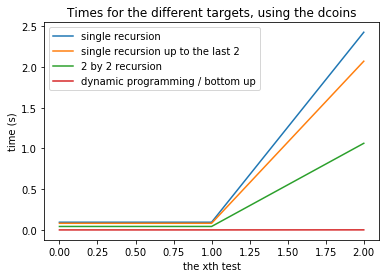

In [168]:
plt.plot(time_rec,label = 'single recursion');
plt.plot(time_rec2,label = 'single recursion up to the last 2');
plt.plot(time_rec_2by2,label = '2 by 2 recursion');
plt.plot(time_pd,label = 'dynamic programming / bottom up');
plt.xlabel('the xth test')
plt.ylabel('time (s)')
plt.title('Times for the different targets, using the dcoins')
plt.legend(loc = 0)
plt.show();